# Music Generation with GANs and Autoencoders

## Collin Dabbieri & Collin McLeod

### Appendix

There's also a GitHub page for the project here https://github.com/Collin-Dabbieri/GAN_Project

In [4]:
import pickle
import numpy as np
from matplotlib import pyplot as plt

FONTSIZE=18

plt.rcParams['figure.figsize']=(15,8)
plt.rcParams['font.size']=FONTSIZE

# WassGAN

Arjovsky et al. 2017 recommend the following hyperparameter values as defaults

- learning rate=0.00005 with no momentum (so RMSprop instead of Adam optimizer)
- clipping parameter=0.01
- batch size=64
- critic boost=5


Using these parameters caused the generator to dominate the discriminator in classifying fake images as shown in the talk (first loss plot for WGAN)
Eventually a critic boost of 10 and a weight clip of 0.001 proved to train well. Below are some other attempted hyperparameter sets, adjusting critic boost and weight clip values from their defaults

## Critic Boost 10, Weight Clip 0.01

In [2]:
fp=open('../WassGAN/results_boost10_clip0.01/WassGan_fifths_Gfilters_48_48_48_Cfilters_64_64_Gstrides_12-2_2-4_Cstrides_2_2_Cboost_10_results_e750.pkl','rb')
#formerly results2/
#in oscer also results2/
results=pickle.load(fp)
fp.close()

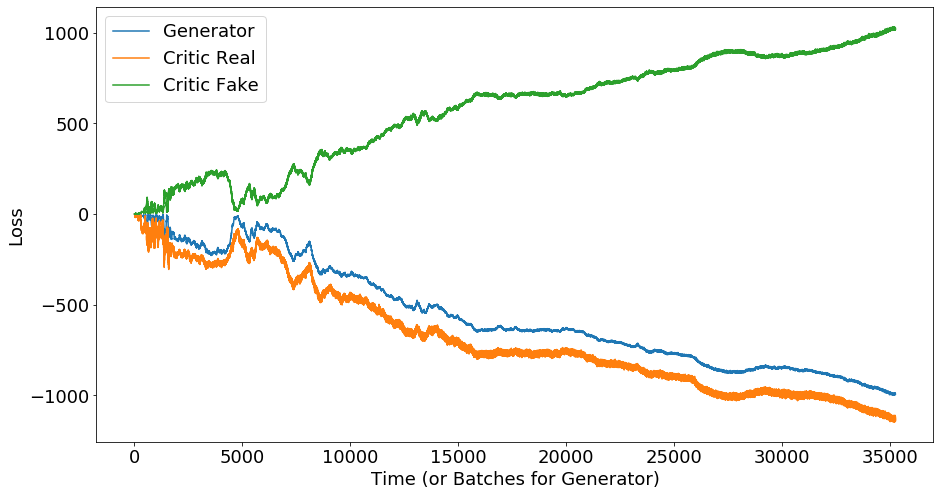

In [5]:
critic_boost=10

gen_loss=results['generator_loss']
critic_real_loss=results['critic_real_loss']
critic_fake_loss=results['critic_fake_loss']

batches=np.arange(len(gen_loss))
batches_critic=np.arange(len(critic_real_loss))/critic_boost
plt.plot(batches,gen_loss,label='Generator')
plt.plot(batches_critic,critic_real_loss,label='Critic Real')
plt.plot(batches_critic,critic_fake_loss,label='Critic Fake')
plt.xlabel('Time (or Batches for Generator)')
plt.ylabel('Loss')
plt.legend(loc='best')

This run shows interesting behavior around 5000 batches but ultimately the generator still dominates

## Critic Boost 10, Weight Clip 0.1

In [6]:
fp=open('../WassGAN/results_boost10_clip0.1/WassGan_fifths_Gfilters_48_48_48_Cfilters_64_64_Gstrides_12-2_2-4_Cstrides_2_2_Cboost_10_WeightClip_0.1_results_e650.pkl','rb')
results=pickle.load(fp)
fp.close()

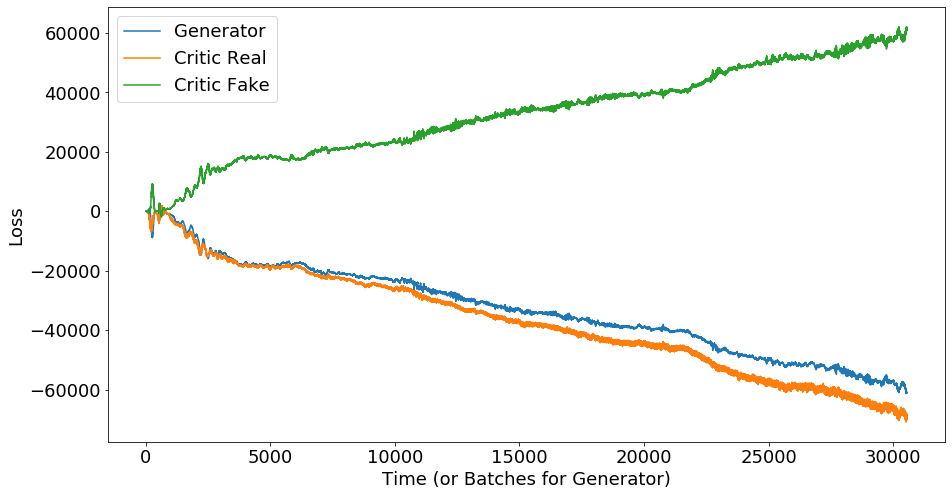

In [7]:
critic_boost=10

gen_loss=results['generator_loss']
critic_real_loss=results['critic_real_loss']
critic_fake_loss=results['critic_fake_loss']

batches=np.arange(len(gen_loss))
batches_critic=np.arange(len(critic_real_loss))/critic_boost
plt.plot(batches,gen_loss,label='Generator')
plt.plot(batches_critic,critic_real_loss,label='Critic Real')
plt.plot(batches_critic,critic_fake_loss,label='Critic Fake')
plt.xlabel('Time (or Batches for Generator)')
plt.ylabel('Loss')
plt.legend(loc='best')

As expected this run fails to train well. Allowing the critic to produce larger weights (and thus larger gradients) gives the generator an increased advantage in training. As it already had an advantage in the previous run, it makes sense that the generator would dominate this run.

## Critic Boost 15, Weight Clip 0.01

In [8]:
fp=open('../WassGAN/results_boost15_clip0.01/WassGan_fifths_Gfilters_48_48_48_Cfilters_64_64_Gstrides_12-2_2-4_Cstrides_2_2_Cboost_15_WeightClip_0.01_results_e550.pkl','rb')
results=pickle.load(fp)
fp.close()

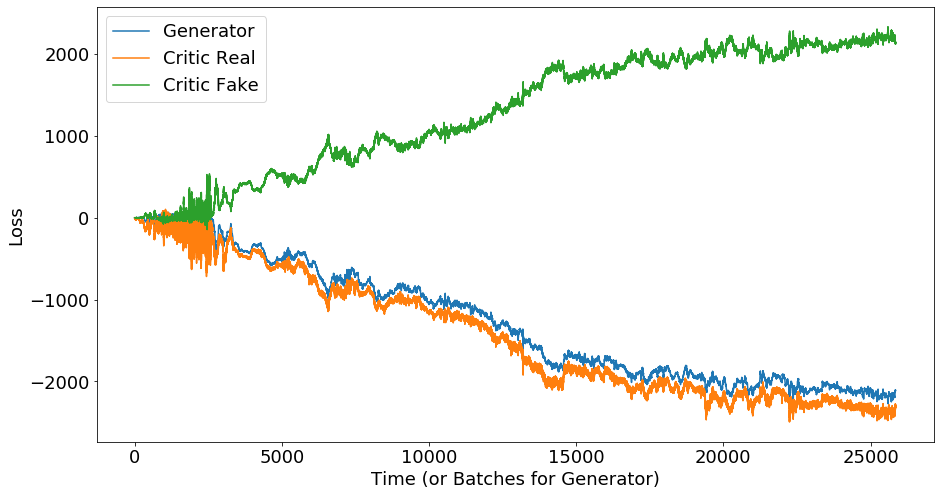

In [9]:
critic_boost=15

gen_loss=results['generator_loss']
critic_real_loss=results['critic_real_loss']
critic_fake_loss=results['critic_fake_loss']

batches=np.arange(len(gen_loss))
batches_critic=np.arange(len(critic_real_loss))/critic_boost
plt.plot(batches,gen_loss,label='Generator')
plt.plot(batches_critic,critic_real_loss,label='Critic Real')
plt.plot(batches_critic,critic_fake_loss,label='Critic Fake')
plt.xlabel('Time (or Batches for Generator)')
plt.ylabel('Loss')
plt.legend(loc='best')

we've added an extra boost by training the critic for 5 additional batches for each generator batch, and returned to the default weight clip value, but this run still does not train evenly. This suggests to me that properly setting weight clip values is more important than the critic boost.

# ConvAE

In order to test how both the loss and the numerical instability depend on the number of parameters, I tested some different architectures.  In general, adding more parameters significantly worsens the numerical instability, and can cause it to appear earlier in training.  Adding more parameters can also improve the model's overall accuracy, however, so it is necessary to strike a balance.  The plot below shows four training runs for each of three different architectures.  The red architecture includes roughly 500,000 parameters, characterized by layers with 8,10,12,16 filters with convolutional kernels of sizes 12,10,8,6.  The blue has roughly 800,000 parameters, with 8,10,12,16 filters and larger kernels:  30,25,20,15.  The green has the most parameters (roughly 1,000,000) with 10,15,20,25 filters and kernels of size 24,18,12,6.  This plot only includes 100 epochs of training for each model, but demonstrates that larger kernels help the model learn more structure.

![AE losses](../ConvAE/training_losses.png)